In [1]:
import pandas
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
import matplotlib.pyplot as plt
import random

Using TensorFlow backend.


# Week 3 Part 1 - Regression

In [2]:
concrete_data = pandas.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
input_data = concrete_data[[c for c in concrete_data.columns if c != 'Strength']]
output_data = concrete_data['Strength']

In [4]:
predictors_norm = (input_data - input_data.mean()) / input_data.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


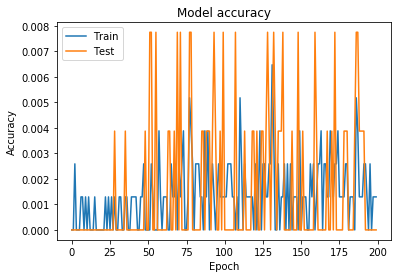

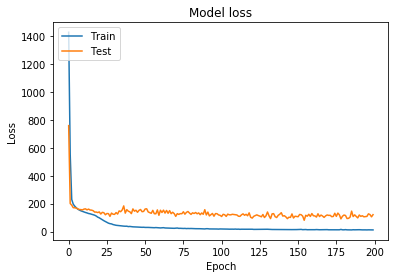

In [102]:


def regression_model(topology):
    # create model
    model = Sequential()
    
    n_cols = topology[0]
    ###Add hidden with extrapolated input from n_cols
    model.add(Dense(topology[1], activation='relu', input_shape=(n_cols,)))
    model.add(Dense(topology[2], activation='relu'))
    model.add(Dense(topology[-1]))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    return model

#Input Layer is len input_data, 50 hidden layer 1, 50 hidden layer 2
model_untrained = regression_model([len(input_data.columns),100,100,100,1])

model = regression_model([len(input_data.columns),100,100,100,1])

plot_model(model,show_layer_names=False,show_shapes=True)

history = model.fit(predictors_norm, output_data,validation_split=0.25,batch_size=16, epochs=200,verbose=0)

#Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [106]:
prediction = model.predict(predictors_norm)
array = output_data
array = np.array([[i] for i in array])
#Checkout the first 10
loss = prediction - array
msd = sum(loss**2)/len(loss)
msd

array([38.53101764])

In [107]:
prediction = model_untrained.predict(predictors_norm)
array = output_data
array = np.array([[i] for i in array])
#Checkout the first 10
loss = prediction - array
msd = sum(loss**2)/len(loss)
msd

array([1560.91296704])

# Week 3 - Part 2 - Classification

In [2]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [3]:
# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

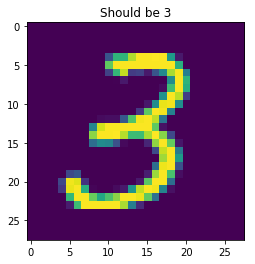

In [5]:
#Each entry is an image containing a 28 by 28 matrix
rand_int = random.randint(0,len(X_train))
plt.title('Should be {}'.format(y_train[rand_int]))
plt.imshow(X_train[rand_int])

In [6]:
##60K immages of 28 by 28
X_train.shape

(60000, 28, 28)

In [7]:
##shuld by x by y dimensions
total_num_pixels = X_train.shape[1] * X_train.shape[-1]

#28 by 28
total_num_pixels

784

In [8]:
X_train = X_train.reshape(X_train.shape[0], total_num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], total_num_pixels).astype('float32') # flatten training images

In [9]:
##Now sixty thousand immages with 784 length vector
X_train.shape

(60000, 784)

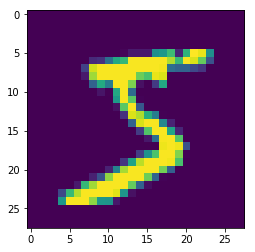

In [10]:
plt.imshow(X_train[0].reshape(28,28))

In [11]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

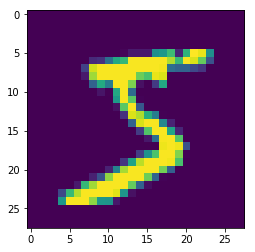

In [12]:
plt.imshow(X_train[0].reshape(28,28))

In [13]:
# one hot encode outputs

##There are 10 digits. but y variable only tells us which digit the x_ vraible corresponds to. 
##So you create a 10 dimensional vector [0,0,0,1...] where it's 0 everywhere except for the digit you are interested in [1,0.0...0] would be the output of 1
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


In [14]:
y_train.shape

(60000, 10)

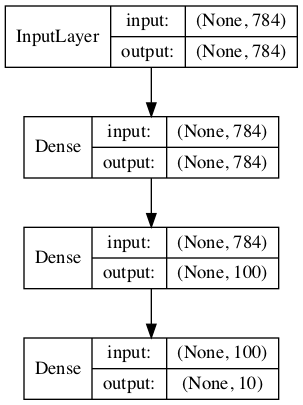

In [18]:
# define classification model
def classification_model(topology):
    # create model
    model = Sequential()
    model.add(Dense(topology[1], activation='relu', input_shape=(topology[0],)))
    model.add(Dense(topology[2], activation='relu'))
    model.add(Dense(topology[-1], activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = classification_model([total_num_pixels,total_num_pixels,100,num_classes])
untrained_model = classification_model([total_num_pixels,total_num_pixels,100,num_classes])
plot_model(model,show_layer_names=False,show_shapes=True)

In [19]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 15s - loss: 0.1851 - accuracy: 0.9438 - val_loss: 0.0875 - val_accuracy: 0.9721
Epoch 2/10
 - 14s - loss: 0.0789 - accuracy: 0.9754 - val_loss: 0.0841 - val_accuracy: 0.9755
Epoch 3/10
 - 16s - loss: 0.0536 - accuracy: 0.9832 - val_loss: 0.0743 - val_accuracy: 0.9791
Epoch 4/10
 - 15s - loss: 0.0399 - accuracy: 0.9875 - val_loss: 0.0794 - val_accuracy: 0.9775
Epoch 5/10
 - 16s - loss: 0.0323 - accuracy: 0.9890 - val_loss: 0.0835 - val_accuracy: 0.9771
Epoch 6/10
 - 18s - loss: 0.0263 - accuracy: 0.9917 - val_loss: 0.0820 - val_accuracy: 0.9782
Epoch 7/10
 - 19s - loss: 0.0219 - accuracy: 0.9927 - val_loss: 0.0838 - val_accuracy: 0.9787
Epoch 8/10
 - 16s - loss: 0.0189 - accuracy: 0.9937 - val_loss: 0.0918 - val_accuracy: 0.9794
Epoch 9/10
 - 14s - loss: 0.0177 - accuracy: 0.9942 - val_loss: 0.0811 - val_accuracy: 0.9809
Epoch 10/10
 - 14s - loss: 0.0188 - accuracy: 0.9938 - val_loss: 0.0763 - val_accuracy: 0.9833


In [20]:
final_evaluation = model.evaluate(X_test, y_test, verbose=2)

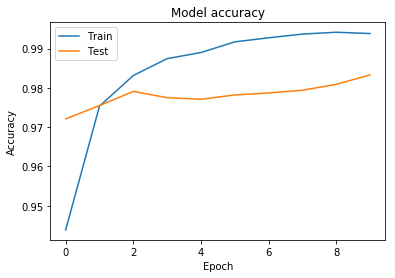

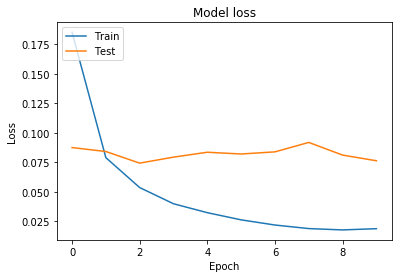

In [21]:
#Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [40]:
print('Accuracy: {:0.3}% \n Error: {:.2}%'.format(final_evaluation[1]*100, (1 - final_evaluation[1])*100))

#Or can just get it from history


print('Accuracy: {:0.3}% \n Error: {:.2}%'.format(history.history['val_accuracy'][-1]*100, 
                                                  (1 - history.history['val_accuracy'][-1])*100))

Accuracy: 98.3% 
 Error: 1.7%
Accuracy: 98.3% 
 Error: 1.7%
